# Spam SMS Prediction Case Study

### Problem Statement:
We have the data containing sms and the class they belong to i.e, spam/ham. We need to build a classifier model which can classify the sms into ham/spam class.

## Naive Bayes Model.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [2]:
# readfing the text dataset
df=pd.read_table('SMSSpamCollection.txt',header=None, names=['Class', 'sms'])
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# checking for NaNs 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# converting to binary categories
df.Class=df.Class.replace({'spam':1,'ham':0})
df

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
# spliting the dataframe to train-test 
df_train,df_test=train_test_split(df,train_size=0.7,random_state=1)

In [6]:
df_train=df_train.values
df_test=df_test.values

In [7]:
# splitting to x and y cases
X_train=df_train[:,1]
y_train=df_train[:,0].astype('int')
X_test=df_test[:,1]
y_test=df_test[:,0].astype('int')

In [8]:
X_train

array(['what are your new years plans?',
       'Finally the match heading towards draw as your prediction.',
       "Lemme know when I can swing by and pick up, I'm free basically any time after 1 all this semester",
       ...,
       'CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES',
       'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence',
       'K k:) sms chat with me.'], dtype=object)

In [9]:
# initialising the countvector
cv=CountVectorizer(stop_words='english')

In [10]:
# fit and transforming to get compressed spars matrix
X_train_transformed=cv.fit_transform(X_train,y_train)
X_test_transformed=cv.transform(X_test)
print(X_train_transformed)

  (0, 4272)	1
  (0, 6855)	1
  (0, 4682)	1
  (1, 2550)	1
  (1, 3930)	1
  (1, 3018)	1
  (1, 2202)	1
  (1, 4801)	1
  (2, 3650)	1
  (2, 3548)	1
  (2, 5957)	1
  (2, 4644)	1
  (2, 2663)	1
  (2, 1119)	1
  (2, 6163)	1
  (2, 5369)	1
  (3, 4406)	1
  (3, 1485)	1
  (3, 6353)	1
  (4, 3685)	1
  (4, 6043)	1
  (4, 2000)	1
  (4, 1949)	1
  (4, 2478)	1
  (4, 222)	1
  :	:
  (3897, 1542)	1
  (3897, 5026)	1
  (3897, 2207)	1
  (3897, 1386)	1
  (3897, 1252)	1
  (3898, 3472)	1
  (3898, 3435)	1
  (3898, 4148)	1
  (3898, 6074)	1
  (3898, 5115)	1
  (3898, 799)	1
  (3898, 6196)	1
  (3898, 243)	1
  (3898, 5399)	1
  (3898, 344)	1
  (3898, 295)	1
  (3898, 4584)	1
  (3898, 3966)	1
  (3898, 1959)	1
  (3898, 5273)	1
  (3898, 5031)	1
  (3898, 2590)	1
  (3898, 6122)	1
  (3899, 1574)	1
  (3899, 5590)	1


In [11]:
# shape of spars matrix
X_train_transformed.toarray().shape

(3900, 6904)

In [12]:
# Unique features
cv.vocabulary_

{'new': 4272,
 'years': 6855,
 'plans': 4682,
 'finally': 2550,
 'match': 3930,
 'heading': 3018,
 'draw': 2202,
 'prediction': 4801,
 'lemme': 3650,
 'know': 3548,
 'swing': 5957,
 'pick': 4644,
 'free': 2663,
 'basically': 1119,
 'time': 6163,
 'semester': 5369,
 'ok': 4406,
 'care': 1485,
 'umma': 6353,
 'like': 3685,
 'tell': 6043,
 'deepest': 2000,
 'darkest': 1949,
 'fantasies': 2478,
 '09094646631': 222,
 'just': 3472,
 '60p': 538,
 'min': 4022,
 'stop': 5804,
 'texts': 6083,
 '08712460324': 103,
 'nat': 4218,
 'rate': 4985,
 'lmao': 3732,
 'fish': 2566,
 'memory': 3984,
 'need': 4243,
 'yahoo': 6841,
 'boys': 1324,
 'bring': 1354,
 'perf': 4592,
 'legal': 3644,
 'hiya': 3083,
 'comin': 1722,
 'bristol': 1358,
 'st': 5740,
 'week': 6637,
 'april': 940,
 'les': 3656,
 'got': 2862,
 'rudi': 5234,
 'yrs': 6882,
 'eve': 2383,
 'snoring': 5603,
 'drunk': 2226,
 'bak': 1092,
 'college': 1710,
 'work': 6769,
 'sends': 5374,
 'ink': 3289,
 'bath': 1123,
 'wamma': 6574,
 'laid': 3581,
 '

## Naive Bayes Model Building

### **Multinomial Naive bayes.**

In [13]:
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)

MultinomialNB()

In [14]:
# predecting for trained data set
y_train_pred_prob=mnb.predict_proba(X_train_transformed)
y_train_pred_class=mnb.predict(X_train_transformed)
## predecting for test data set
y_test_pred_prob=mnb.predict_proba(X_test_transformed)
y_test_pred_class=mnb.predict(X_test_transformed)

In [15]:
# accuracy for train data set
accuracy_train=metrics.accuracy_score(y_train,y_train_pred_class)
print('Train data set accuracy = %f'%accuracy_train)

# accuracy for test data set
accuracy_test=metrics.accuracy_score(y_test,y_test_pred_class)
print('Test data set accuracy = %f'%accuracy_test)

Train data set accuracy = 0.993846
Test data set accuracy = 0.986244


In [16]:
# confusion matrix
conf_matrix=metrics.confusion_matrix(y_test,y_test_pred_class)
conf_matrix

array([[1434,    8],
       [  15,  215]], dtype=int64)

In [17]:
# sensitivity and specificity for train data set
sensitivity_train=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('sensitivity = %f'%sensitivity_train)
specificity_train=conf_matrix[0,0]/(conf_matrix[0,1]+conf_matrix[0,0])
print('specificity = %f'%specificity_train)

sensitivity = 0.934783
specificity = 0.994452


In [18]:
def draw_roc(actual,pred):
    fpr,tpr,threshold=metrics.roc_curve(actual,pred,drop_intermediate=False)
    auc=metrics.roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='roc_auc= %f'%auc)
    plt.legend(loc='lower right')
    plt.title('ROC_curve')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    

In [19]:
auc_mult=metrics.roc_auc_score(y_test,y_test_pred_class)

In [20]:
# Results
print('accuracy = %f'%accuracy_test)
print('sensitivity = %f'%sensitivity_train)
print('specificity = %f'%specificity_train)

accuracy = 0.986244
sensitivity = 0.934783
specificity = 0.994452


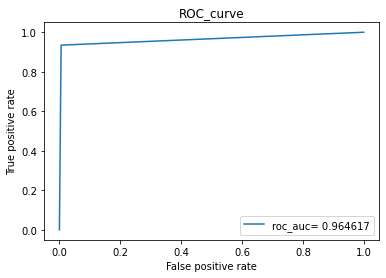

In [21]:
# plotting ROC curve
draw_roc(y_test,y_test_pred_class)

### **Bernoulli Naive bayes.**

In [22]:
bnb=BernoulliNB()

In [23]:
# fitting bernoylii model
bnb.fit(X_train_transformed,y_train)

BernoulliNB()

In [24]:
y_test_pred_bnb=bnb.predict(X_test_transformed)

In [25]:
# accuarcy
accuracy_bnb=metrics.accuracy_score(y_test,y_test_pred_bnb)
print('accuracy =%f'%accuracy_bnb)

accuracy =0.973086


In [26]:
# creating confusion matrix
conf_mat_bnb=metrics.confusion_matrix(y_test,y_test_pred_bnb)
conf_mat_bnb

array([[1441,    1],
       [  44,  186]], dtype=int64)

In [27]:
# sensitivity and specificity 
sen=conf_mat_bnb[1,1]/(conf_mat_bnb[1,1]+conf_mat_bnb[1,0])
spec=conf_mat_bnb[0,0]/(conf_mat_bnb[0,0]+conf_mat_bnb[0,1])
print('accuracy =%f'%accuracy_bnb)
print('sensitivity = %f'%sen)
print('specificity = %f'%spec)

accuracy =0.973086
sensitivity = 0.808696
specificity = 0.999307


In [28]:
auc_bnb=metrics.roc_auc_score(y_test,y_test_pred_bnb)

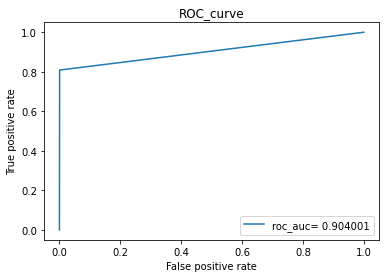

In [29]:
draw_roc(y_test,y_test_pred_bnb)

## Comparing multinominal and Bernoulli naive bayes models.

In [30]:
print('             Multinominal          Bernoulli')
print(f'accuracy     {accuracy_test}     {accuracy_bnb}')
print(f'sensitivity  {sensitivity_train}    {sen}')
print(f'specificity  {specificity_train}    {spec}')
print(f'auc          {auc_mult}     {auc_bnb}')

             Multinominal          Bernoulli
accuracy     0.986244019138756     0.9730861244019139
sensitivity  0.9347826086956522    0.808695652173913
specificity  0.9944521497919556    0.9993065187239945
auc          0.964617379243804     0.9040010854489537


**From the two models we can see that Bernoulli has high specificity and relatively low accuracy,sensitivity and auc score.**

**But in this case we want to achieve high specificity i.e, we want the model to identify all the `ham` sms correctly, even at the expence of predecting the `spam` sms as `ham` sometimes. Here we do not want the model to misclassify ham as spam.**

**Hence as per our requirement the best model would be Bernoulli even at the expence of accuracy,sensitivity and auc score.**

**Bernoulli model correctly classifies `99.93%` of ham sms.**

**Hence we can go ahead with this model and use it for classifying sms into spam or ham class.**